# gymnasium Custom Environment - Modify an existing environment


gymnasium packages contain a list of environments to test our Reinforcement Learning (RL) algorithm. For example, this previous notebook used FrozenLake environment to test a TD-lerning method. While these environments are greate testbeds, we often want to customize the provided environment to see how an agent behaves in different environments. It is also a great interest to create own custom environment and test our algorithm. 
gymnasium provides an easy way to do them. In this series of notebooks, we will learn
- How to edit an existing environment in gymnasium (this nootebook)
- How to create a custom environment with gymnasium (next notebook)


## Basic structure of gymnasium environment

Let's first explore what defines a gym environment.
Each gymnasium environment contains 4 main functions listed as below (obtained from [official documentation](https://gymnasium.farama.org/api/env/))

- reset() : Resets the environment to an initial state, required before calling step. Returns the first agent observation for an episode and information, i.e. metrics, debug info.

- step() : Updates an environment with actions returning the next agent observation, the reward for taking that actions, if the environment has terminated or truncated due to the latest action and information from the environment about the step, i.e. metrics, debug info.

- render() : Renders the environments to help visualise what the agent see, examples modes are “human”, “rgb_array”, “ansi” for text.

- close() : Closes the environment, important when external software is used, i.e. pygame for rendering, databases

These functions define the properties of the environment and how the environment responds to actions taken by the agent. When starting a new episode, reset() is called to initiaze the environment. At each time step, when an agent takes an action, step() is called to encode the action and observe its consequences, such as changes in the agent's state or any rewards recieved.
render() function is used to visualize the current state of the environment when needed. Lastly, when the simulation is complete, close() is called to properly clean up any resources that were used.

Let's understand these functions more with an example using FrozenLake environment. 

The objective of an agent in this environment is to navigate through a grid world, starting from the initial cell and reaching the goal cell. Here, we are using a 4x4 grid map, and each cell falls into one of four different categories:

- **S (Start)**: This cell is where our agent begins its journey.

- **F (Frozen)**: These cells are safe for the agent to walk on.

- **H (Hole)**: These are hazardous cells, and if the agent falls into one, the episode terminates with a reward of 0.

- **G (Goal)**: Reaching this cell yields a reward of +1 for the agent.

From the starting cell, the agent has the option to move in four directions: up, left, down, or right. The agent's task is to explore the grid world, making decisions at each time step to eventually reach the goal cell and collect a reward of +1.

In the below code, we can see an example of the agent randomly exploring this environment over 20 time steps.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import LEFT, RIGHT, DOWN, UP
from IPython.display import clear_output

# !pip install gymnasium[toy-text]

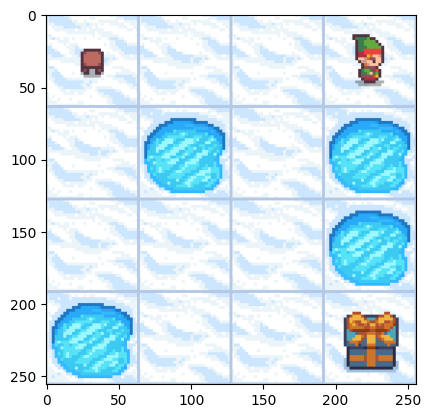

Total reward: 0.0


In [2]:
def random_exploration(env, num_step):
    # Reset the environment to its initial state and get the initial observation (initial state)
    observation, info = env.reset(seed=2023)
    
    # Simulate the agent's actions for num_step time steps
    rewards = []
    for _ in range(num_step):
        # Choose a random action from the action space
        action = env.action_space.sample()

        # Take the chosen action and observe the resulting state, reward, and termination status
        observation, reward, terminated, truncated, info = env.step(action)
        rewards.append(reward)

        # If the episode is terminated, reset the environment to the start cell
        if terminated:
            observation, info = env.reset()

        # Display the current state of the environment
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.show()
        
    return rewards

# Create the FrozenLake environment with specific settings
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode="rgb_array")
rewards = random_exploration(env, 20)
env.close()
print(f"Total reward: {np.round(np.sum(rewards), 2)}")


With gymnausium's predefined environment, it is very easy to run the simulation. 


As you may have observed, the default behavior is for the agent to start from the top-left cell and aim to reach the bottom-right cell.

Let's begin by adjusting the initial state of the environment. By default, in this environment, the agent always begins in the top-left corner. Now, let's experiment with changing both the initial and goal locations. We'll set our starting position to the bottom-right and our goal position to the top-left. To achieve this, we can utilize the 'desc' argument when creating the environment, which specifies the starting position.

Reference: The original code of FrozenLake is avalable [here](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/toy_text/frozen_lake.py). 


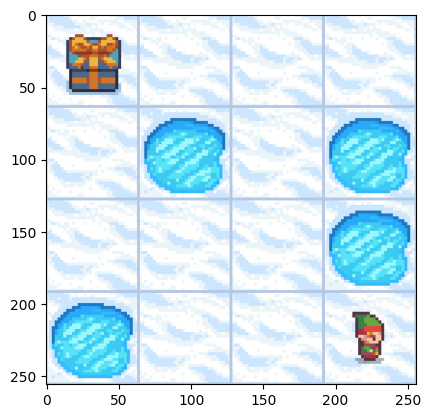

Total reward: 0.0


In [3]:
MAPS = ["GFFF", "FHFH", "FFFH", "HFFS"]

# Create the FrozenLake environment with specific settings
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode="rgb_array", desc=MAPS)
rewads = random_exploration(env, 20)
env.close()
print(f"Total reward: {np.round(np.sum(rewards), 2)}")


In this scenario, we can adjust our environment without modifying the original class and function simply by passing the appropriate argument. The gymnasium environment provides several options for modifying the environment. When beginning to use the Gymnasium environment, it's a good idea to check their documentation to explore the kinds of modifications that are already available within the package.

## Edit an existing environment

Next, let's consider a scenario where the original function doesn't provide the functionality we need. Here, we aim to modify the reward function. By default, an agent receives +1 reward upon reaching the goal and no other rewards. We will introduce a negative reward -0.1 as a penalty at each step to encourage the agent to reach the goal quickly. To do this, we inherit FrozenLakeEnv class in gymnasium and define a new step function.


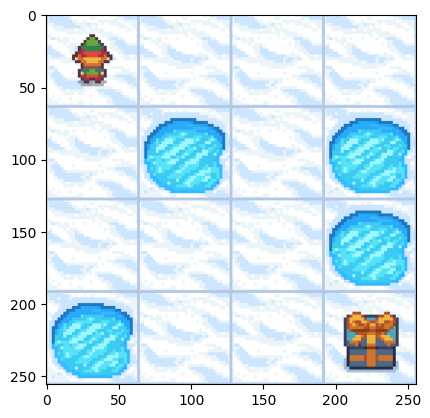

Total reward: -2.0


In [4]:
from gymnasium.envs.toy_text.frozen_lake import FrozenLakeEnv

class CustomFrozenLakeEnv(FrozenLakeEnv):
    def __init__(self, **kwargs):
        super(CustomFrozenLakeEnv, self).__init__(**kwargs)

    def step(self, action):
        # Get the next state, reward, done, and info using the parent class's step function
        observation, reward, terminated, truncated, info = super(CustomFrozenLakeEnv, self).step(action)
        # Add penalty if an agnet does not reach the goal
        if reward == 0:  # if the agent doesn't reach the goal
            reward = -0.1  # penalize the agent for each step
        
        return observation, reward, terminated, truncated, info 

# Create an instance of your custom environment
env = CustomFrozenLakeEnv(map_name="4x4", is_slippery=False, render_mode="rgb_array")
rewards = random_exploration(env, 20)
print(f"Total reward: {np.round(np.sum(rewards), 2)}")


We can see that the agent received total reward of -2.0 over 20 steps (i.e. -0.1 penality at each time step). 

Like this example, we can easily customize the existing environment by inheriting the originam gymnasium class. For example, even if we modify a step function within a parent environment class, we can keep using the original reset and render functions without changing anything.

## Summary

In this notebook, we learned the basic of gymnasium environment and how to customize them. In the next notebook, we will learn how to create own customized environment using gymnasium!